In [163]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
column_names = ('duration',
                'protocol_type',
                'service',
                'flag',
                'src_bytes',
                'dst_bytes',
                'land',
                'wrong_fragment',
                'urgent',
                'hot',
                'num_failed_logins',
                'logged_in',
                'num_compromised',
                'root_shell',
                'su_attempted',
                'num_root',
                'num_file_creations',
                'num_shells',
                'num_access_files',
                'num_outbound_cmds',
                'is_host_login',
                'is_guest_login',
                'count',
                'srv_count',
                'serror_rate',
                'srv_serror_rate',
                'rerror_rate',
                'srv_rerror_rate',
                'same_srv_rate',
                'diff_srv_rate',
                'srv_diff_host_rate',
                'dst_host_count',
                'dst_host_srv_count',
                'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate',
                'dst_host_srv_serror_rate',
                'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate',
                'attack_type',
                'difficulty_level')

data = pd.read_csv('data/NSL-KDD/KDDTrain+_20Percent.txt', header=None, names=column_names)

data = data.drop(columns='difficulty_level')
data['Y'] = np.where(data['attack_type'] == 'normal', 0, 1)
data = data.drop(columns='attack_type')

In [150]:
def attack_percentage(df):
    return df.sum() / df.count() 

In [151]:
# delete variables with 0 variance
data = data.drop(columns=['num_outbound_cmds', 'is_host_login'])

In [152]:
# urgent & num_shells has max 1 but are not indicators
indicator_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_hot_login', 'is_guest_login']

In [153]:
# create dummy variavbles
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_vars)
data = pd.get_dummies(data)

['protocol_type', 'service', 'flag']


In [154]:
# urgent & num_shells has max 1 but are not indicators
# is_hot_login is an indicator but was dropped due to 0 variance
indicator_vars = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_guest_login']
indicator_vars = indicator_vars + data.columns.tolist()[38:]

#### Multicolinearity

In [144]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,0,1,2,3,4,5,6,7,8,9
0,1,0.347533,0.398948,0.455743,0.0729144,-0.233402,-0.731222,0.477978,-0.442621,0.0151847
1,0.347533,1,-0.284056,0.571003,-0.285483,0.38248,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1,-0.523649,0.152937,-0.139176,-0.0928948,0.0162655,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.44665
4,0.0729144,-0.285483,0.152937,-0.225343,1,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.38248,-0.139176,-0.227577,-0.104438,1,-0.0302517,0.41764,0.205851,0.0950844
6,-0.731222,-0.362842,-0.0928948,-0.481548,-0.147477,-0.0302517,1,-0.49444,0.381407,-0.353652
7,0.477978,0.642578,0.0162655,0.473286,-0.523283,0.41764,-0.49444,1,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1,0.150421
9,0.0151847,0.190047,-0.383585,0.44665,-0.189916,0.0950844,-0.353652,0.417863,0.150421,1


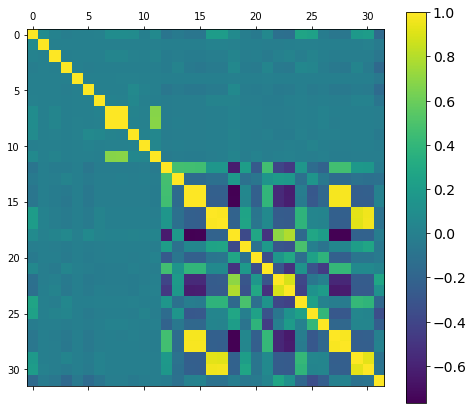

In [117]:
figure = plt.figure(figsize=(8, 7))
plt.matshow(data.drop(columns=indicator_vars+['Y']).corr(), fignum=figure.number)
colorbar = plt.colorbar()
colorbar.ax.tick_params(labelsize=14)
plt.show()

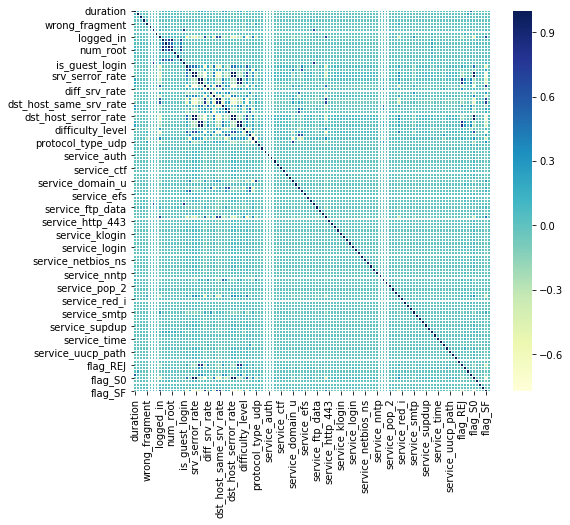

In [118]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = data.corr() 
f, ax = plt.subplots(figsize =(8, 7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


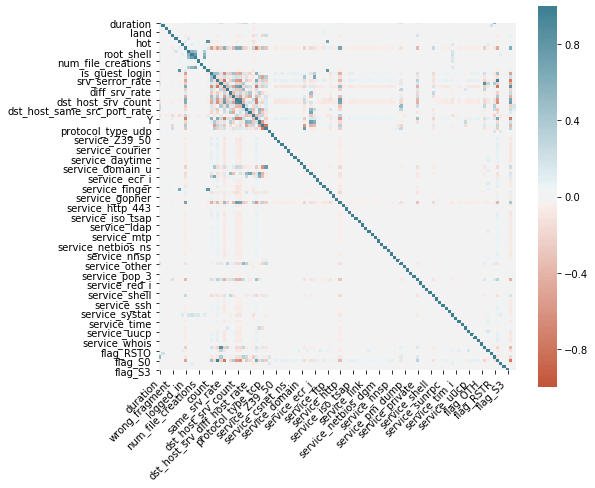

In [148]:
figure = plt.figure(figsize=(8, 7))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

abs(correlation) > 0.9<br>
num_compromised & num_root<br>
serror_rate & srv_serror_rate & dst_host_serror_rate & dst_host_srv_serror_rate<br>
rerror_rate & srv_rerror_rate & dst_host_rerror_rate & dst_host_srv_rerror_rate

In [155]:
data[['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']].var()

serror_rate                 0.200088
srv_serror_rate             0.200345
dst_host_serror_rate        0.198307
dst_host_srv_serror_rate    0.198983
dtype: float64

In [156]:
data[['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']].var()

rerror_rate                 0.101599
srv_rerror_rate             0.103900
dst_host_rerror_rate        0.093556
dst_host_srv_rerror_rate    0.100701
dtype: float64

In [ ]:
# drop
data = data.drop(columns=['num_compromised'])
data = data.drop(columns=['serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate'])
data = data.drop(columns=['rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'])

In [116]:
# (data.drop(columns=indicator_vars+['Y']).corr() > 0.95).sum()
# (abs(data.drop(columns=indicator_vars+['Y']).corr()) > 0.9).sum()

# Feature Select

In [167]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='Y').values
y = data['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [168]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [177]:
feature_importance.sort(key=itemgetter(1))
feature_importance

[('land', 0.0),
 ('wrong_fragment', 0.0),
 ('urgent', 0.0),
 ('num_failed_logins', 0.0),
 ('root_shell', 0.0),
 ('su_attempted', 0.0),
 ('num_shells', 0.0),
 ('num_access_files', 0.0),
 ('is_guest_login', 0.0),
 ('srv_rerror_rate', 0.0),
 ('srv_diff_host_rate', 0.0),
 ('protocol_type_tcp', 0.0),
 ('protocol_type_udp', 0.0),
 ('service_IRC', 0.0),
 ('service_X11', 0.0),
 ('service_Z39_50', 0.0),
 ('service_auth', 0.0),
 ('service_bgp', 0.0),
 ('service_courier', 0.0),
 ('service_csnet_ns', 0.0),
 ('service_ctf', 0.0),
 ('service_daytime', 0.0),
 ('service_discard', 0.0),
 ('service_domain', 0.0),
 ('service_domain_u', 0.0),
 ('service_echo', 0.0),
 ('service_efs', 0.0),
 ('service_exec', 0.0),
 ('service_ftp', 0.0),
 ('service_gopher', 0.0),
 ('service_hostnames', 0.0),
 ('service_http_443', 0.0),
 ('service_http_8001', 0.0),
 ('service_iso_tsap', 0.0),
 ('service_klogin', 0.0),
 ('service_kshell', 0.0),
 ('service_ldap', 0.0),
 ('service_link', 0.0),
 ('service_login', 0.0),
 ('service

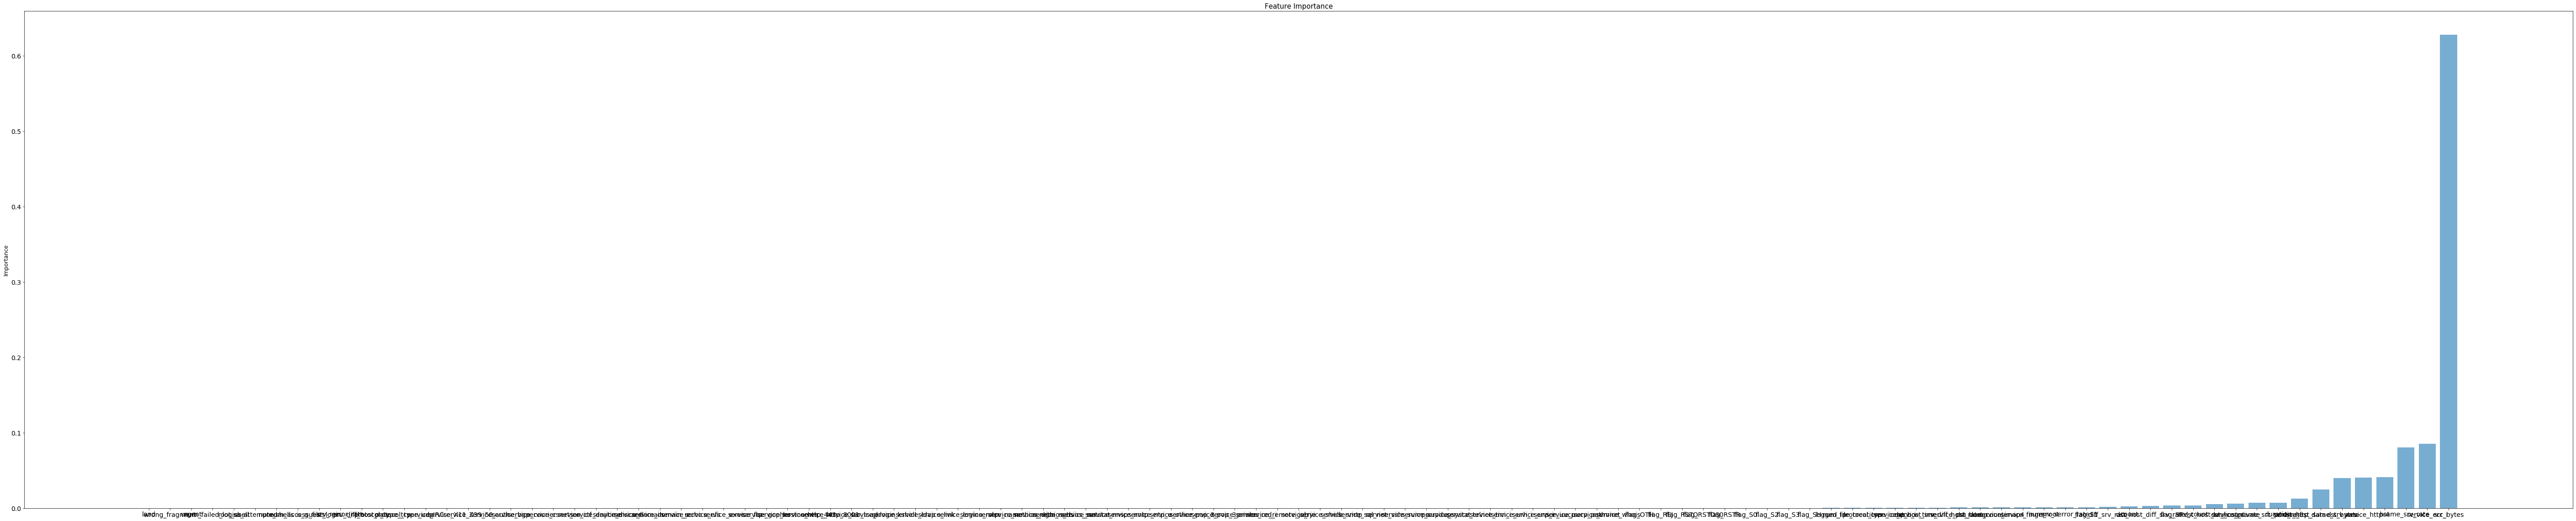

In [174]:
from operator import itemgetter

feature_names = data.drop(columns='Y').columns.tolist()
feature_importance = list(zip(feature_names, tree.feature_importances_))
feature_importance.sort(key=itemgetter(1))
feature_names, importance = zip(*feature_importance)

# plot
fig = plt.figure(figsize=(100,20))
y_pos = np.arange(len(feature_names))
plt.bar(y_pos, importance, align='center', alpha=0.6)
plt.xticks(y_pos, feature_names)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()